In [1]:
# Install necessary libraries (if not already installed)
# !pip install numpy tensorflow sklearn librosa matplotlib

# Import libraries
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt






In [2]:
# ============================== 1. Load and Preprocess Audio Data ==============================
def load_audio_data(folder_path, max_length=100, n_mfcc=40):
    X, y = [], []
    for label in ['fake', 'real']:
        label_path = os.path.join(folder_path, label)
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            # Load audio
            audio, sr = librosa.load(file_path, sr=None)
            # Extract MFCC features
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
            mfcc = mfcc.T  # Shape (time_steps, features)
            # Pad or truncate sequences to ensure uniform input length
            if len(mfcc) > max_length:
                mfcc = mfcc[:max_length]
            X.append(mfcc)
            y.append(label)
    
    # Pad sequences to max_length
    X = pad_sequences(X, maxlen=max_length, dtype='float32', padding='post', truncating='post')
    
    # Encode labels (0 = fake, 1 = real)
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    
    return np.array(X), np.array(y)

In [3]:
# ============================== 2. Load Datasets ==============================
print("Loading datasets...")
dataset_path = r'C:\Users\ACER\OneDrive\Desktop\AshwiCst\Implementation(MP2)\for-2seconds'  # Update this path to your dataset location
train_path = os.path.join(dataset_path, 'training')
val_path = os.path.join(dataset_path, 'validation')
test_path = os.path.join(dataset_path, 'testing')

X_train, y_train = load_audio_data(train_path)
X_val, y_val = load_audio_data(val_path)
X_test, y_test = load_audio_data(test_path)

# Confirm dataset sizes
print(f"Training Samples: {len(X_train)}, Validation Samples: {len(X_val)}, Test Samples: {len(X_test)}")
print(f"Input Shape: {X_train.shape}, Labels Shape: {y_train.shape}")

Loading datasets...


C:\Users\ACER\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Training Samples: 11000, Validation Samples: 2826, Test Samples: 1088
Input Shape: (11000, 100, 40), Labels Shape: (11000,)


In [4]:

# ============================== 3. Build the LSTM Model ==============================
model = keras.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dropout(0.3),
    layers.LSTM(32),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # For binary classification (Real vs Fake)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ============================== 4. Train the Model ==============================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32
)



C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 64)             │          26,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,329 (153.63 KB)

 Trainable params: 39,329 (153.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step - accuracy: 0.8099 - loss: 0.4311 - val_accuracy: 0.9409 - val_loss: 0.1585
Epoch 2/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9579 - loss: 0.1191 - val_accuracy: 0.9593 - val_loss: 0.1028
Epoch 3/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.9765 - loss: 0.0662 - val_accuracy: 0.9791 - val_loss: 0.0595
Epoch 4/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9847 - loss: 0.0487 - val_accuracy: 0.9784 - val_loss: 0.0773
Epoch 5/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9850 - loss: 0.0442 - val_accuracy: 0.9812 - val_loss: 0.0646
Epoch 6/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.9922 - loss: 0.0243 - val_accuracy: 0.9830 - val_loss: 0.0492
Epoch 7/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9930 - loss: 0.0232 - val_accuracy: 0.9901 - val_loss: 0.0312
Epoch 8/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9952 - loss: 0.0177 - 

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5692 - loss: 2.4219
Test Loss: 1.4910, Test Accuracy: 0.7371


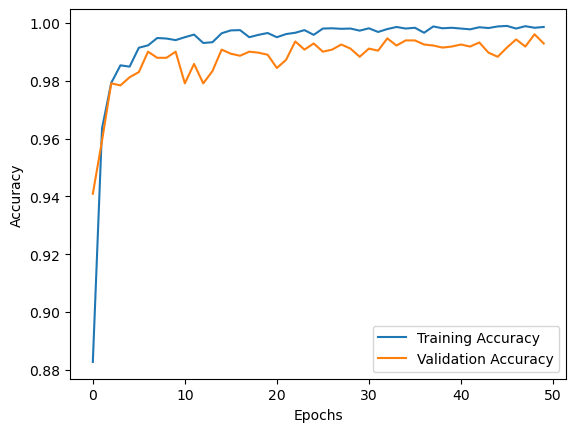

In [5]:
# ============================== 5. Evaluate the Model on Test Data ==============================
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Optional: Plot the training history (Loss/Accuracy over epochs)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# ============================== 6. Test on a Sample Audio File ==============================
def predict_sample(file_path, model, max_length=100, n_mfcc=40):
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc).T
    if len(mfcc) > max_length:
        mfcc = mfcc[:max_length]
    mfcc = pad_sequences([mfcc], maxlen=max_length, dtype='float32', padding='post', truncating='post')
    prediction = model.predict(mfcc)[0][0]
    label = 'Real' if prediction > 0.5 else 'Fake'

    print(f"Prediction: {label} (Confidence: {prediction:.4f})")

# Example usage:
sample_path = r'C:\Users\ACER\Downloads\file10006.wav_16k.wav_norm.wav_mono.wav_silence.wav'  # Update path to your sample file
predict_sample(sample_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Fake (Confidence: 0.0000)


In [ ]:
model.save('train_audio.keras')